In [ ]:
%matplotlib inline
%load_ext Cython

# A Brief Overview of Python in the Atmospheric Science and Remote Sensing Fields.

Joseph C. Hardin, PNNL



# Overview

This talk will be a "sales pitch" for Python. The goal is to
1. Introduce Python
2. Show why it is a vital tool for atmospheric scientists.
3. Show some cool examples of what it can do.
4. Place it into the context of the broader community.
5. Give references for further study.


# Takeaways
 * 30 minutes is not enough time to teach Python.
 * But we can introduce it. 
 * This presentation will be very example oriented.
 * with lots of visualizations.
 
 The goal is you leave this presentation
 * with a feel for whether or not Python will benefit you
 * whether it is worth the time or not to learn (it is!).


# This presentation is available online
https://github.com/josephhardinee/YSPD_seminar_PNNL_2016

![Python Graphic](http://imgs.xkcd.com/comics/python.png)

# Python is
* High Level, Interpreted(sometimes compiled), Dynamic(Duck Typing, although optionally static), Object Oriented language(with optional functional attributes) ....(Whew). 
* Often described as executable pseudocode based on the ease with which it is read.
* 




# Why will you use Python though? 
* Python has a truly vast number of 3rd party free(free as in beer and liberties).    
* This makes many tasks **Very** easy. 
* Everyone else is using it. Code can be shared. 
* A great ecosystem surrounding Python

In [ ]:
from skewt import SkewT
S=SkewT.Sounding("oun_sounding.txt")
S.plot_skewt(color='b');

# Basic Syntax
* Whitespace matters
* Syntax similar to C family of languages(C, Java, matlab).

In [ ]:
digits = range(10)
for x in digits:
    print(x)

* Interpreted

In [ ]:
a = 1
b = 2
print(a + b)

* Dynamic (You can mix some variable types)
* Similar Flow control
* Object oriented.

In [ ]:
x = 4
y = 3.3
t = 'Hello YSPD. '

print(x + y)
print(x * t)

In [ ]:
print(y * t)

* Extremely readable.
* Can wrap other languages, and has a module to generate compiled code.

In [ ]:
%%cython
def intsum(values):
    cdef int value, sum=0
    for value in values:
        sum+= value
    return sum
    

In [ ]:
def slowsum(values):
    sum=0
    for value in values:
        sum+= value
    return sum

In [ ]:
%timeit intsum(range(100000))

In [ ]:
%timeit slowsum(range(100000))

In [ ]:
from math import sin
def f(x):
    return sin(x**2)


def slow_integrate_f(a, b, N):
    
    dx = (b - a)/N
    s = 0
    for i in range(N):
        s += f(a+i*dx)
    return s*dx

In [ ]:
%%cython
cdef extern from "math.h":
    double sin(double x)
    
cdef double f(double x):
    return sin(x**2)

cpdef double integrate_f(double a, double b, int N):
    cdef double dx, s
    cdef int i
    
    dx = (b - a)/N
    s = 0
    for i in range(N):
        s += f(a+i*dx)
    return s*dx


In [91]:
%timeit integrate_f(1, 20, 200000)
%timeit slow_integrate_f(1, 20, 200000)

100 loops, best of 3: 2.41 ms per loop
10 loops, best of 3: 61.8 ms per loop


# Python Ecosystem
The primary strength of Python is the ecosystem that surrounds it. This includes
* Rich Library Support
* More scientific tools than you can shake a stick at. 
* Capable Editors
* Top Notch online communities

I'll cover a few of these here, focusing primarily on the tools and community efforts.

# Distributions
Anaconda and Conda

# Jupyter and Ipython

# Spyder, Canopy, PyCharm

# Numpy
* Numerics and arrays for Python.

# Scipy
* Umbrella library for a large number of tools of scientific use.

# Matplotlib
* Primary Plotting library for Python

# Pandas and Seaborn
Pandas is Python's answer to the R programming language. It is a statistics library for data processing based around the concept of Time Series, and Data Frames


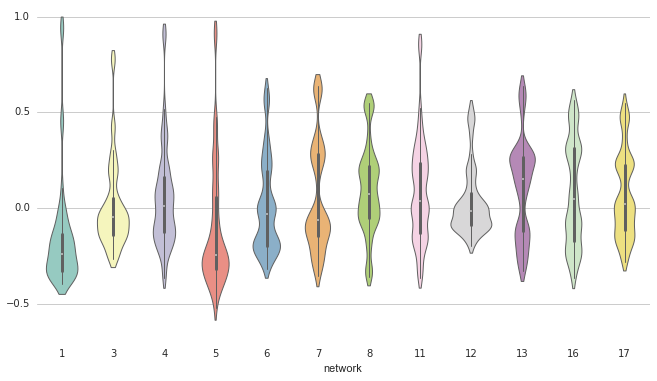

In [99]:
# %load examples/seaborn_example.py
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                                  .astype(int)
                                                            .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)
plt.savefig('img/seaborn_example.png')


# A little easier to see
![seaborn example](img/seaborn_example.png)

# Basemap

# Scipy(The conference), PyData, Women who code. 

# PyAOS

# pep8

# Examples

# Example 1: Density Plots (And a big pet peeve)
* In most cases scatter plots are the incorrect choice of plot. They can be misleading. Very misleading. 
* When a large number of points, use density plots. 
* Should you be presenting a linear number of points, of logarithmic density? 
* Let's do this in python very easily. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
x1 = np.random.randn(10000); y1 = np.random.randn(10000)
x2 = np.random.randn(10000)/2.0; y2 = -1*x2
x = np.hstack((x2, x1)); y = np.hstack((y2,y1))
plt.figure(figsize=(6,6)); plt.subplot(3,1,1); plt.scatter(x, y);
plt.subplot(3,1,2); plt.hist2d(x,y, bins=100);plt.colorbar(); plt.subplot(3,1,3)
plt.hist2d(x,y,bins=100, norm=LogNorm()); plt.colorbar()

# Example 2: Radar Data

# Example 3: Model Data on a Map

# Example 4: Bokeh
Bokeh is a plotting library that utilizes the browser. This makes it perfect for sharing results with a wider audience. 

* Bokeh Example

# Example 5: Warno
Closer to home, WARNO is a monitoring and analytics application developed by the radar team to monitor 33 radars around the world. 

https://dellingr.pnl.gov:8443

# Example 6: IPCluster

# Example 7: Mayavi
* Canyon
* Julia
* Lorenz

# Further Resources

# Books

1. Effective Computation in the Physical Sciences
2. Python for Data Processing
3. Python



# Websites
1. PyAOS
2. StackOverflow
3. Continuum Analytics
4. Enthought.
5. Code likea Pythonista(Common Python Idioms): http://python.net/~goodger/projects/pycon/2007/idiomatic/handout.html

# CoWorkers
A lot of people around PNNL use Python.
1. From the radar group there is Alyssa Matthews, Eddie Schumann, and myself.
2. Susannah Burrows, Phil Rausch



    Debugging is twice as hard as writing the code in the first place. Therefore, if you write the code as cleverly as possible, you are, by definition, not smart enough to debug it.

    —Brian W. Kernighan, co-author of The C Programming Language and the "K" in "AWK"
